### 1. Статистика посещаемости группы

In [ ]:
import csv
with open('vk_group.csv', encoding='utf8') as file:
    stat = csv.reader(file)
    for line in stat:
        if line[0] == 'Дата':
            continue
        else:
            print(line)
        break

['15.03.2020', 'views', '', '', '1']


In [ ]:
import csv
lst = []
with open('vk_group.csv', encoding='utf8') as file:
    stat = csv.reader(file)
    for line in stat:
        if line[0] == 'Дата':
            continue
        elif ('2016' in line[0] and 'views' in line[1]):
            #print(line[0][-4:])
            #print(line[4].strip())
            for i in line[4]:
                lst.append(int(i.strip()))
print(sum(lst))

598


In [ ]:
with open('vk_group.csv', encoding='utf8') as file:
    stat = csv.reader(file)
    for line in stat:
        if line[0] == 'Дата':
            continue
        else:
            visitors16 = [int(line[4]) for line in stat if (line[1] == 'visitors' and '2016' in line[0])]
print(sum(visitors16))
                #visitors[int(line[0][-4:])] = int(line[4])     

610


In [ ]:
import csv
years = [2016, 2017, 2018, 2019, 2020]
with open('vk_group.csv', encoding='utf8') as file:
    stat = csv.reader(file)
    views16 = [int(line[4]) for line in stat if (line[1] == 'views' and '2016' in line[0])]
print(sum(views16))

841


In [ ]:
views = dict()
visitors = dict()
with open('vk_group.csv', encoding='utf8') as file:
    stat = csv.reader(file)
    for line in stat:
        if line[1] == 'views':
            if line[0][-4:] not in views:
                views[line[0][-4:]] = int(line[4])
            else:
                views[line[0][-4:]] += int(line[4])
print(views)

{'2020': 309, '2019': 1896, '2018': 733, '2017': 1132, '2016': 841}


In [ ]:
views = dict()
visitors = dict()
with open('vk_group.csv', encoding='utf8') as file:
    stat = csv.reader(file)
    for line in stat:
        if line[1] == 'views':
            if line[0][-4:] not in views:
                views[line[0][-4:]] = int(line[4])
            else:
                views[line[0][-4:]] += int(line[4])
        if line[1] == 'visitors':
            if line[0][-4:] not in visitors:
                visitors[line[0][-4:]] = int(line[4])
            else:
                visitors[line[0][-4:]] += int(line[4])
print(views)
print(visitors)

{'2020': 309, '2019': 1896, '2018': 733, '2017': 1132, '2016': 841}
{'2020': 204, '2019': 1057, '2018': 535, '2017': 823, '2016': 610}


In [ ]:
x = views.items()
print(x)

dict_items([('2020', 309), ('2019', 1896), ('2018', 733), ('2017', 1132), ('2016', 841)])


*Превращаю словарь в список и сортирую его в порядке возрастания по годам.*

In [ ]:
sorted_views = sorted(x, reverse=False)
print(sorted_views)

[('2016', 841), ('2017', 1132), ('2018', 733), ('2019', 1896), ('2020', 309)]


In [ ]:
y = visitors.items()
sorted_visitors = sorted(y, reverse=False)
print(sorted_visitors)

[('2016', 610), ('2017', 823), ('2018', 535), ('2019', 1057), ('2020', 204)]


In [ ]:
x = views.items()
sorted_views = dict(sorted(x, reverse=False))
print(sorted_views.keys())

dict_keys(['2016', '2017', '2018', '2019', '2020'])


In [ ]:
sorted_visitors = dict(sorted(y, reverse=False))
print(sorted_visitors.values())

dict_values([610, 823, 535, 1057, 204])


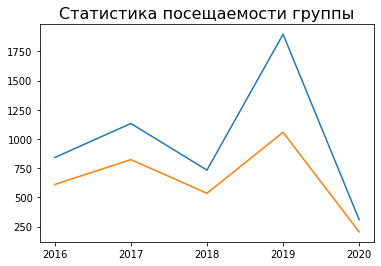

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(list(sorted_views.keys()), list(sorted_views.values()), list(sorted_visitors.keys()), list(sorted_visitors.values()))
plt.title('Статистика посещаемости группы', fontsize=16);
plt.show()

#### Вывод:
Проведённый анализ показал, что отношение количества просмотров *(синяя кривая)* контента в группе к количеству уникальных посетителей *(оранжевая кривая)* равняется $ \approx \frac{3}{2} $, в частности, данное соотношение можно отследить на графике. Насчёт динамики посещаемости за период с 2016 по 2020 годы стоит сказать, что в группе наблюдается **тренд снижения** данного уровня, но такой вывод получился лишь из-за того, что данные собраны только на **начало** 2020 года. Для полноценного анализа необходимо провести те же операции, имея данные на **конец** 2020 года.

Пока что пик популярности группы приходится на **2019** год.

### 2. Анализ охвата аудитории

*Провожу аналогичные действия, анализируя охват по годам.*

In [ ]:
reach = dict()
reach_subscribers = dict()
with open('vk_group.csv', encoding='utf8') as file:
    stat = csv.reader(file)
    for line in stat:
        if line[1] == 'reach':
            if line[0][-4:] not in reach:
                reach[line[0][-4:]] = int(line[4])
            else:
                reach[line[0][-4:]] += int(line[4])
        if line[1] == 'reach_subscribers':
            if line[0][-4:] not in reach_subscribers:
                reach_subscribers[line[0][-4:]] = int(line[4])
            else:
                reach_subscribers[line[0][-4:]] += int(line[4])
print(reach)

{'2020': 491, '2019': 4000, '2018': 475, '2017': 733, '2016': 555}


In [ ]:
r = reach.items()
sorted_reach = dict(sorted(r, reverse=False))
z = reach_subscribers.items()
sorted_reach_subscribers = dict(sorted(z, reverse=False))

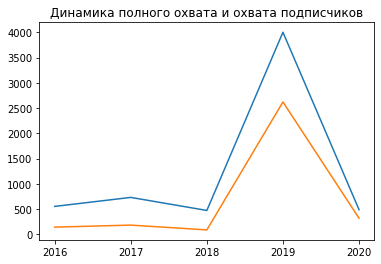

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(list(sorted_reach.keys()), list(sorted_reach.values()), list(sorted_reach_subscribers.keys()), list(sorted_reach_subscribers.values()))
plt.title('Динамика полного охвата и охвата подписчиков', fontsize=12);
plt.show()

#### Вывод:
По графику видно, что количество подписчиков, просматривающих записи сообщества, на 2020 год **увеличилось** по сравнению с началом исследуемого периода. Охват за 2019 год кардинально отличается от среднего охвата других лет: такой разброс можно объяснить *сбоем в сборе статистики* за этот год. Факт того, что получившееся число в 2019 году в несколько раз больше *статистики посещаемости группы* за тот же год, также свидетельствует об ошибке в данных. 

Если считать, что в 2019 году охват был больше 500 и меньше 1000, основываясь на других годах, то можно заключить, что динамика как полного охвата, так и охвата только подписчиков, отличается **стабильностью** и **небольшим приростом**.

### 3. Анализ демографии

#### 3.1. Анализ пола посетителей

In [ ]:
import csv
gender = dict()
with open('vk_group.csv', encoding='utf8') as file:
    stat = csv.reader(file)
    for line in stat:
        if line[1] == 'gender':
            if line[2] not in gender:
                gender[line[2]] = int(line[4])
            else:
                gender[line[2]] += int(line[4])

In [ ]:
print(gender)

{'М': 1888, 'Ж': 965}


In [ ]:
import csv
age = dict()
with open('vk_group.csv', encoding='utf8') as file:
    stat = csv.reader(file)
    for line in stat:
        if line[1] == 'age':
            if line[2] not in age:
                age[line[2]] = int(line[4])
            else:
                age[line[2]] += int(line[4])
print(age)

{'30-35': 299, '24-27': 277, '27-30': 160, '35-45': 141, '1-18': 82, '21-24': 546, '18-21': 852, '45+': 198}


In [ ]:
import csv
age = dict()
with open('vk_group.csv', encoding='utf8') as file:
    stat = csv.reader(file)
    for line in stat:
        if line[1] == 'age':
            if line[2] not in age:
                age[line[2]] = int(line[4])
            else:
                age[line[2]] += int(line[4])
        if line[1] == 'gender_age':
            if line[3] not in age:
                age[line[3]] = int(line[4])
            else:
                age[line[3]] += int(line[4])
print(age)

{'30-35': 598, '24-27': 554, '27-30': 320, '35-45': 282, '1-18': 164, '21-24': 1092, '18-21': 1704, '45+': 396}


In [ ]:
import csv
gender = dict()
age = dict()
countries = dict()
with open('vk_group.csv', encoding='utf8') as file:
    stat = csv.reader(file)
    for line in stat:
        if line[1] == 'gender':
            if line[2] not in gender:
                gender[line[2]] = int(line[4])
            else:
                gender[line[2]] += int(line[4])
        if line[1] == 'age':
            if line[2] not in age:
                age[line[2]] = int(line[4])
            else:
                age[line[2]] += int(line[4])
        if line[1] == 'gender_age':
            if line[3] not in age:
                age[line[3]] = int(line[4])
            else:
                age[line[3]] += int(line[4])
        if line[1] == 'countries':
            if line[2] not in countries:
                countries[line[2]] = int(line[4])
            else:
                countries[line[2]] += int(line[4])

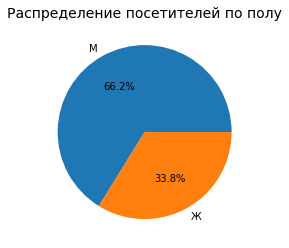

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
labels = gender.keys()
values = gender.values()
plt.title('Распределение посетителей по полу', fontsize=14);
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.show()

##### Вывод:
Основная аудитория сообщества – представители *мужского* пола. *Женщины* составляют $ \approx \frac{1}{3} $ всех пользователей.

#### 3.2. Анализ возраста посетителей

In [ ]:
a = list(age.items())
print(a)

[('30-35', 598), ('24-27', 554), ('27-30', 320), ('35-45', 282), ('1-18', 164), ('21-24', 1092), ('18-21', 1704), ('45+', 396)]


In [ ]:
a[-4], a[0] = a[0], a[-4]
print(a)

[('1-18', 164), ('24-27', 554), ('27-30', 320), ('35-45', 282), ('30-35', 598), ('21-24', 1092), ('18-21', 1704), ('45+', 396)]


In [ ]:
a[-2], a[1] = a[1], a[-2]
print(a)

[('1-18', 164), ('18-21', 1704), ('27-30', 320), ('35-45', 282), ('30-35', 598), ('21-24', 1092), ('24-27', 554), ('45+', 396)]


In [ ]:
a[5], a[4] = a[4], a[5]
print(a)

[('1-18', 164), ('18-21', 1704), ('27-30', 320), ('35-45', 282), ('21-24', 1092), ('30-35', 598), ('24-27', 554), ('45+', 396)]


In [ ]:
sorted_age = dict(a)

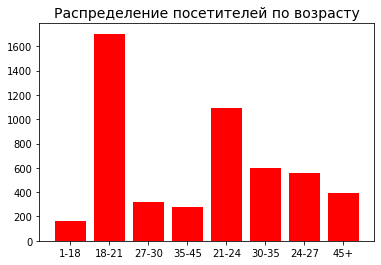

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(sorted_age.keys(), sorted_age.values(), color='red')
plt.title('Распределение посетителей по возрасту', fontsize=14);
plt.show()

##### Вывод:
По графику видно, что основная масса посетителей сообщества относится к двум возрастным категориям:
* 18-21 лет
* 21-24 лет 

Такое распределение свидетельствует о том, что материалы сообщества могут быть очень популярны у **студентов**.

#### 3.3. Анализ стран проживания посетителей

In [ ]:
c = list(countries.items())
print(c)

[('Россия', 2888), ('Германия', 11), ('Франция', 11), ('Индонезия', 3), ('США', 59), ('Китай', 2), ('Южная Корея', 3), ('Мексика', 1), ('Таиланд', 6), ('Великобритания', 7), ('Беларусь', 29), ('Венгрия', 1), ('Сингапур', 3), ('Малайзия', 2), ('Казахстан', 52), ('Канада', 2), ('Финляндия', 2), ('Украина', 67), ('Вьетнам', 2), ('Азербайджан', 4), ('Нидерланды', 6), ('Польша', 3), ('Швеция', 3), ('Босния и Герцеговина', 1), ('Молдова', 7), ('Узбекистан', 2), ('', 21), ('Испания', 4), ('Армения', 5), ('Швейцария', 1), ('Пакистан', 1), ('Бразилия', 1), ('Кыргызстан', 5), ('Таджикистан', 1), ('Япония', 2), ('Дания', 1), ('Израиль', 3), ('Эстония', 1), ('Тайвань', 1), ('Италия', 1), ('Ирландия', 1), ('Турция', 2), ('Латвия', 1)]


In [ ]:
for i in c:
    if '' in i:
        del i
print(c)

[('Россия', 2888), ('Германия', 11), ('Франция', 11), ('Индонезия', 3), ('США', 59), ('Китай', 2), ('Южная Корея', 3), ('Мексика', 1), ('Таиланд', 6), ('Великобритания', 7), ('Беларусь', 29), ('Венгрия', 1), ('Сингапур', 3), ('Малайзия', 2), ('Казахстан', 52), ('Канада', 2), ('Финляндия', 2), ('Украина', 67), ('Вьетнам', 2), ('Азербайджан', 4), ('Нидерланды', 6), ('Польша', 3), ('Швеция', 3), ('Босния и Герцеговина', 1), ('Молдова', 7), ('Узбекистан', 2), ('', 21), ('Испания', 4), ('Армения', 5), ('Швейцария', 1), ('Пакистан', 1), ('Бразилия', 1), ('Кыргызстан', 5), ('Таджикистан', 1), ('Япония', 2), ('Дания', 1), ('Израиль', 3), ('Эстония', 1), ('Тайвань', 1), ('Италия', 1), ('Ирландия', 1), ('Турция', 2), ('Латвия', 1)]


*На данном этапе я решила **удалить Россию из списка стран**, так как число пользователей из нашей страны значительно превышает число пользователей из других стран, и график получается **непрезентабельным**. В выводах Россия обязательно будет учтена.*

In [ ]:
del c[0]
print(c)

[('Германия', 11), ('Франция', 11), ('Индонезия', 3), ('США', 59), ('Китай', 2), ('Южная Корея', 3), ('Мексика', 1), ('Таиланд', 6), ('Великобритания', 7), ('Беларусь', 29), ('Венгрия', 1), ('Сингапур', 3), ('Малайзия', 2), ('Казахстан', 52), ('Канада', 2), ('Финляндия', 2), ('Украина', 67), ('Вьетнам', 2), ('Азербайджан', 4), ('Нидерланды', 6), ('Польша', 3), ('Швеция', 3), ('Босния и Герцеговина', 1), ('Молдова', 7), ('Узбекистан', 2), ('', 21), ('Испания', 4), ('Армения', 5), ('Швейцария', 1), ('Пакистан', 1), ('Бразилия', 1), ('Кыргызстан', 5), ('Таджикистан', 1), ('Япония', 2), ('Дания', 1), ('Израиль', 3), ('Эстония', 1), ('Тайвань', 1), ('Италия', 1), ('Ирландия', 1), ('Турция', 2), ('Латвия', 1)]


summa = 0
for i[1] in list(c):
    summa += int(i[1])
print(summa)

val = list(countries.values())
v = sum(list(countries.values()))
print(v)

In [ ]:
#country = dict(zip(list(countries.keys()), [round(i/v, 4) for i in val])) 

*Была идея построить график, основываясь на процентном распределении, но решила, что это излишние действия*

In [ ]:
sorted_countries = dict(sorted(c, reverse=True))
print(sorted_countries)

{'Япония': 2, 'Южная Корея': 3, 'Эстония': 1, 'Швеция': 3, 'Швейцария': 1, 'Франция': 11, 'Финляндия': 2, 'Украина': 67, 'Узбекистан': 2, 'Турция': 2, 'Тайвань': 1, 'Таиланд': 6, 'Таджикистан': 1, 'Сингапур': 3, 'США': 59, 'Польша': 3, 'Пакистан': 1, 'Нидерланды': 6, 'Молдова': 7, 'Мексика': 1, 'Малайзия': 2, 'Латвия': 1, 'Кыргызстан': 5, 'Китай': 2, 'Канада': 2, 'Казахстан': 52, 'Италия': 1, 'Испания': 4, 'Ирландия': 1, 'Индонезия': 3, 'Израиль': 3, 'Дания': 1, 'Германия': 11, 'Вьетнам': 2, 'Венгрия': 1, 'Великобритания': 7, 'Бразилия': 1, 'Босния и Герцеговина': 1, 'Беларусь': 29, 'Армения': 5, 'Азербайджан': 4, '': 21}


*Далее я изучила дополнительные источники, чтобы подобрать наиболее наглядный, по моему мнению, график и суметь его построить.*

~~import numpy as np
import matplotlib.pyplot as plt
labels = sorted_countries.keys()
values = sorted_countries.values()
position = np.arange(len(sorted_countries))
fig, ax = plt.subplots()
ax.barh(position, values)
ax.set_yticks(position)
ax.set_yticklabels(labels, fontsize = 15)
fig.set_figwidth(10)
fig.set_figheight(20)
plt.show()~~

~~import matplotlib.pyplot as plt
%matplotlib inline
labels = sorted_countries.keys()
values = sorted_countries.values()
plt.title('Распределение посетителей по странам', fontsize=20);
plt.pie(values, labels=labels, radius = 2, autopct='%1.2f%%')
plt.legend(
    bbox_to_anchor = (2.0, 2.0),
    loc = 'upper left', labels = labels )
plt.show()~~

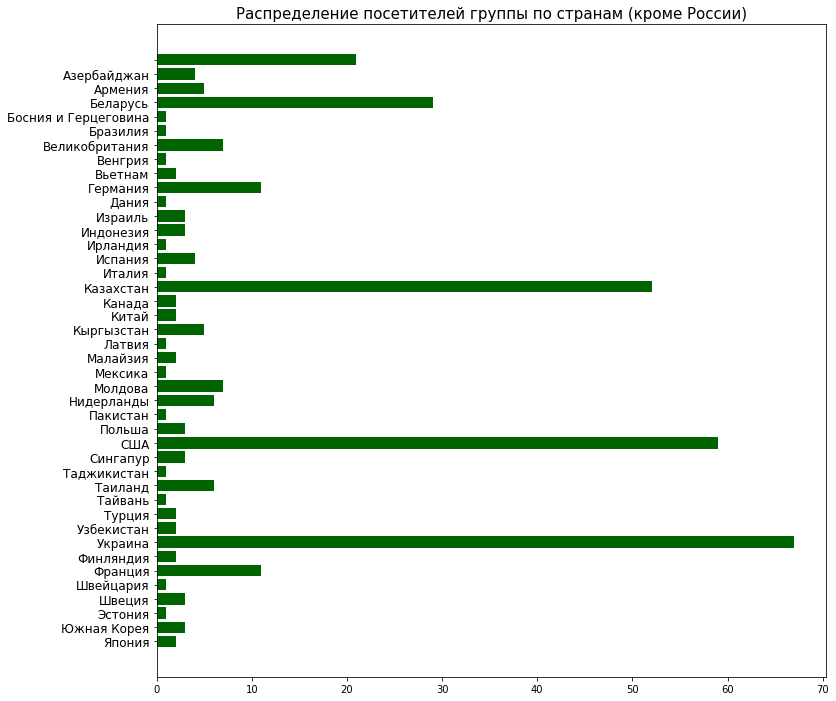

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

labels = sorted_countries.keys()
values = sorted_countries.values()
position = np.arange(len(sorted_countries))
fig, ax = plt.subplots()
ax.barh(position, values, color = 'darkgreen')
ax.set_yticks(position)
ax.set_yticklabels(labels, fontsize = 12)
fig.set_figwidth(12)
fig.set_figheight(12)
plt.title("Распределение посетителей группы по странам (кроме России)", fontsize=15);
plt.show()

##### Вывод:
В ходе анализа данных по странам было выявлено, что граждане **России** являются основными посетителями сообщества и составляют $ \approx $ **90%** *(2888 человек за весь исследуемый период)*.

Из остальных $ \approx $ **10%**, которые **отражены на графике выше**, видно, что тройку стран с наибольшим числом посетителей после России представляют собой *(в порядке убывания)*:
1. Украина
2. США
3. Казахстан

### 4. Анализ обратной связи

In [ ]:
sections = dict()
with open('vk_group.csv', encoding='utf8') as file:
    stat = csv.reader(file)
    for line in stat:
        if line[1] == 'sections':
            if line[2] not in sections:
                sections[line[2]] = int(line[4])
            else:
                sections[line[2]] += int(line[4])
print(sections)

{'Обсуждения': 290, 'Фотоальбомы': 284, 'Видеозаписи': 110}


In [ ]:
feedback = dict()
with open('vk_group.csv', encoding='utf8') as file:
    stat = csv.reader(file)
    for line in stat:
        if line[1] == 'feedback':
            if line[2] not in feedback:
                feedback[line[2]] = int(line[4])
            else:
                feedback[line[2]] += int(line[4])
print(feedback)

{'Нравится': 88, 'Рассказали друзьям': 3, 'Упоминания': 1, 'Комментарии': 5}


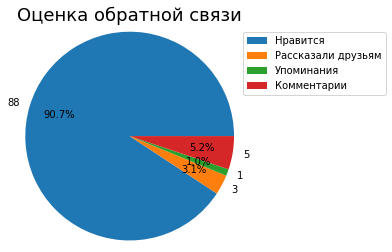

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

labels = feedback.keys()
values = feedback.values()
plt.title('Оценка обратной связи', fontsize=18);
plt.pie(values, labels = values, radius = 1.2, autopct='%1.1f%%', pctdistance = 0.7,)
plt.legend(bbox_to_anchor = (1.7, 1.0), labels = labels )

plt.show()

#### Вывод:
Основным типом активности посетителей группы является нажатие кнопки "Нравится", совсем немногие вдобавок делятся новостями сообщества и комментируют их. В общем и целом над активностью аудитории *необходимо работать*, так как в совокупности единиц обратной связи насчитывается менее 100 за весь период статистики.

### 5. Подходит ли группа для продвижения нового товара среди активных пользователей из России моложе 30 лет?

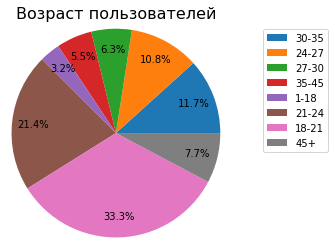

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

labels = age.keys()
values = age.values()
plt.title('Возраст пользователей', fontsize=16);
plt.pie(values, radius = 1.2, autopct='%1.1f%%', pctdistance = 0.8)
plt.legend(bbox_to_anchor = (1.5, 1.0), labels = labels )

plt.show()

Для более наглядного представления возрастных категорий я решила вывести данные в виде круговой диаграммы. Так, мы можем заключить, что исходя из *критерия "пользователи моложе 30 лет"* группа определённо подходит для продвижения нового товара, так как они составляют $ \approx $ 55% аудитории. То же самое можно заключить и по *критерию "из России"*, так как российские граждане составляют $ \approx $ 90% всех пользователей. Что касается активности аудитории, этот вопрос **спорный**, так как:
1. Мы не можем сказать точно, насколько активны посетители группы, если под активностью понимается понятие "активный образ жизни"
2. Если под активностью понимается участие пользователей в жизни группы, то они не отличаются большой инициативностью, как показал проведённый анализ; такой исход можно объяснить, например, специфичностью рекламируемого товара, и получается, что активность не является обязательным элементом существования группы. Если исход объяснить ничем нельзя, то *по данному параметру* сообщество **не подходит** для продвижения нового товара среди обозначенной группы пользователей, так за достаточно длительный период с 2016 по начало 2020 года пользователи не проявили активности, достаточной для гипотетического продвижения нового товара.